In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
print(tf.__version__)

2.1.0


- Auto MPG Dataset

In [3]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'C:\\Users\\i\\.keras\\datasets\\auto-mpg.data'

In [4]:
columns = ['mpg' , 'cylinders' , 'displacement' , 'horsepower', 'weight' , 'acceleration', 'model year', 'origin' ]

raw_dataset = pd.read_csv(dataset_path, names=columns, sep=" ", comment='\t', skipinitialspace=True)
raw_dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [5]:
dataset = raw_dataset.copy()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [6]:
dataset['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [8]:
# 데이터 정제
dataset['horsepower'].replace('?', np.nan, inplace=True)
dataset.isnull().sum()
dataset.dropna(subset=['horsepower'], axis=0, inplace=True) # horsepower 열에서 na 값의 행만 삭제
dataset['horsepower'] = dataset['horsepower'].astype('float')

In [9]:
dataset = dataset.dropna()
dataset['origin'].unique()

array([1, 3, 2], dtype=int64)

In [10]:
# origin 은 수치형이 아니고 범주형이므로 원-핫 인코딩을 통한 변환이 필요
# 1 == USA, 2==Europe, 3==Korea
origin = dataset.pop('origin')

dataset['USA'] = (origin==1) *1.0
dataset['Europe'] =(origin==2) *2.0
dataset['Korea']=(origin==3) *3.0
dataset.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,USA,Europe,Korea
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,2.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [11]:
# 세트 분할
train_set =  dataset.sample(frac=.8, random_state=0)
test_set = dataset.drop(train_set.index)

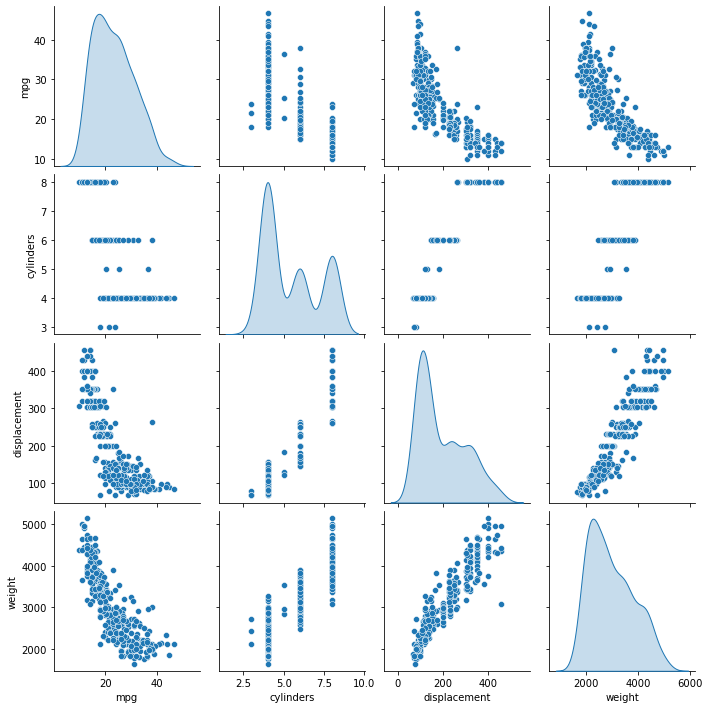

In [12]:
sns.pairplot(train_set[['mpg','cylinders','displacement','weight']], diag_kind='kde')

In [13]:
train_stats = train_set.describe()
train_stats.pop('mpg')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
model year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.356688,0.766826,0.0,0.00,0.0,0.00,2.0
Korea,314.0,0.592357,1.196135,0.0,0.00,0.0,0.00,3.0


In [14]:
y_train = train_set.pop('mpg')
y_test = test_set.pop('mpg')

In [15]:
# 데이터 정규화
def norm(x):
    return (x - train_stats['mean'])/train_stats['std']

norm_train_set = norm(train_set)
norm_test_set = norm(test_set)

In [16]:
norm_train_set

,cylinders,displacement,horsepower,weight,acceleration,model year,USA,Europe,Korea
146,-0.869348,-1.009459,-0.784052,-1.025303,-0.379759,-0.516397,0.774676,-0.465148,-0.495225
282,-0.869348,-0.530218,-0.442811,-0.118796,0.624102,0.843910,0.774676,-0.465148,-0.495225
69,1.483887,1.482595,1.447140,1.736877,-0.738281,-1.060519,0.774676,-0.465148,-0.495225
378,-0.869348,-0.865687,-1.099044,-1.025303,-0.308055,1.660094,0.774676,-0.465148,-0.495225
331,-0.869348,-0.942365,-0.994047,-1.001603,0.875068,1.115971,-1.286751,-0.465148,2.012852
...,...,...,...,...,...,...,...,...,...
281,0.307270,0.044872,-0.521559,-0.000298,0.946772,0.843910,0.774676,-0.465148,-0.495225
229,1.483887,1.961837,1.972127,1.457223,-1.598734,0.299787,0.774676,-0.465148,-0.495225
150,-0.869348,-0.836932,-0.311564,-0.710099,-0.021237,-0.516397,-1.286751,-0.465148,2.012852
145,-0.869348,-1.076553,-1.151543,-1.169870,1.233589,-0.516397,-1.286751,-0.465148,2.012852


In [34]:
# model 만들기
model = keras.Sequential([
    layers.Dense(50, activation='relu', input_shape=[len(train_set.keys())]),
    layers.Dense(50, activation='relu'),
    layers.Dense(1)
])
optimizer = tf.keras.optimizers.RMSprop()
model.compile(loss='mse', optimizer=optimizer, metrics=['mse','mae'])

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 50)                500       
_________________________________________________________________
dense_7 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 3,101
Trainable params: 3,101
Non-trainable params: 0
_________________________________________________________________


In [36]:
# 모델 학습

class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
    
# 훈련 정확도와 검증 정확도: history
history = model.fit(norm_train_set, y_train, epochs=1000, validation_split=.2, verbose=1)


Train on 251 samples, validate on 63 samples
Epoch 1/1000
251/251 [==============================] - 1s 3ms/sample - loss: 583.0551 - mse: 583.0552 - mae: 22.9351 - val_loss: 586.3871 - val_mse: 586.3870 - val_mae: 22.9910
Epoch 2/1000
251/251 [==============================] - 0s 127us/sample - loss: 545.8551 - mse: 545.8550 - mae: 22.1316 - val_loss: 549.9821 - val_mse: 549.9821 - val_mae: 22.2139
Epoch 3/1000
251/251 [==============================] - 0s 124us/sample - loss: 511.4109 - mse: 511.4109 - mae: 21.3673 - val_loss: 510.7813 - val_mse: 510.7812 - val_mae: 21.3497
Epoch 4/1000
251/251 [==============================] - 0s 116us/sample - loss: 473.8654 - mse: 473.8654 - mae: 20.5146 - val_loss: 467.8623 - val_mse: 467.8622 - val_mae: 20.3642
Epoch 5/1000
251/251 [==============================] - 0s 108us/sample - loss: 433.4692 - mse: 433.4692 - mae: 19.5496 - val_loss: 421.9971 - val_mse: 421.9971 - val_mae: 19.2505
Epoch 6/1000
251/251 [==============================] - 0

Epoch 48/1000
251/251 [==============================] - 0s 80us/sample - loss: 7.8953 - mse: 7.8953 - mae: 1.9822 - val_loss: 9.0159 - val_mse: 9.0159 - val_mae: 2.2521
Epoch 49/1000
251/251 [==============================] - 0s 88us/sample - loss: 7.6657 - mse: 7.6657 - mae: 1.9338 - val_loss: 9.0173 - val_mse: 9.0173 - val_mae: 2.3089
Epoch 50/1000
251/251 [==============================] - 0s 76us/sample - loss: 7.5815 - mse: 7.5815 - mae: 1.9389 - val_loss: 8.9263 - val_mse: 8.9263 - val_mae: 2.2831
Epoch 51/1000
251/251 [==============================] - 0s 100us/sample - loss: 7.5864 - mse: 7.5864 - mae: 1.9376 - val_loss: 9.2062 - val_mse: 9.2062 - val_mae: 2.2490
Epoch 52/1000
251/251 [==============================] - 0s 76us/sample - loss: 7.5423 - mse: 7.5423 - mae: 1.9374 - val_loss: 8.9381 - val_mse: 8.9381 - val_mae: 2.2465
Epoch 53/1000
251/251 [==============================] - 0s 92us/sample - loss: 7.5104 - mse: 7.5104 - mae: 1.9324 - val_loss: 8.8097 - val_mse: 8.80

251/251 [==============================] - 0s 88us/sample - loss: 6.4124 - mse: 6.4124 - mae: 1.7871 - val_loss: 8.7635 - val_mse: 8.7635 - val_mae: 2.2861
Epoch 97/1000
251/251 [==============================] - 0s 92us/sample - loss: 6.2935 - mse: 6.2935 - mae: 1.7552 - val_loss: 8.8514 - val_mse: 8.8514 - val_mae: 2.2416
Epoch 98/1000
251/251 [==============================] - 0s 80us/sample - loss: 6.5762 - mse: 6.5762 - mae: 1.8188 - val_loss: 8.6984 - val_mse: 8.6984 - val_mae: 2.2796
Epoch 99/1000
251/251 [==============================] - 0s 88us/sample - loss: 6.4643 - mse: 6.4643 - mae: 1.7863 - val_loss: 8.7437 - val_mse: 8.7437 - val_mae: 2.2486
Epoch 100/1000
251/251 [==============================] - 0s 84us/sample - loss: 6.3739 - mse: 6.3739 - mae: 1.7787 - val_loss: 8.7608 - val_mse: 8.7608 - val_mae: 2.2897
Epoch 101/1000
251/251 [==============================] - 0s 76us/sample - loss: 6.3945 - mse: 6.3945 - mae: 1.7756 - val_loss: 8.5912 - val_mse: 8.5912 - val_mae:

251/251 [==============================] - 0s 76us/sample - loss: 6.0855 - mse: 6.0855 - mae: 1.7310 - val_loss: 8.3479 - val_mse: 8.3479 - val_mae: 2.2266
Epoch 145/1000
251/251 [==============================] - 0s 88us/sample - loss: 5.9181 - mse: 5.9181 - mae: 1.7120 - val_loss: 8.3432 - val_mse: 8.3432 - val_mae: 2.2593
Epoch 146/1000
251/251 [==============================] - 0s 80us/sample - loss: 5.8447 - mse: 5.8447 - mae: 1.6994 - val_loss: 8.6148 - val_mse: 8.6148 - val_mae: 2.2178
Epoch 147/1000
251/251 [==============================] - 0s 84us/sample - loss: 5.9667 - mse: 5.9667 - mae: 1.7261 - val_loss: 8.4853 - val_mse: 8.4853 - val_mae: 2.2984
Epoch 148/1000
251/251 [==============================] - 0s 76us/sample - loss: 5.9362 - mse: 5.9362 - mae: 1.6938 - val_loss: 8.3356 - val_mse: 8.3356 - val_mae: 2.2553
Epoch 149/1000
251/251 [==============================] - 0s 88us/sample - loss: 5.9638 - mse: 5.9638 - mae: 1.7046 - val_loss: 8.5160 - val_mse: 8.5160 - val_m

Epoch 192/1000
251/251 [==============================] - 0s 80us/sample - loss: 5.7574 - mse: 5.7574 - mae: 1.6612 - val_loss: 8.5270 - val_mse: 8.5270 - val_mae: 2.2776
Epoch 193/1000
251/251 [==============================] - 0s 92us/sample - loss: 5.6751 - mse: 5.6751 - mae: 1.6564 - val_loss: 8.5677 - val_mse: 8.5677 - val_mae: 2.2199
Epoch 194/1000
251/251 [==============================] - 0s 76us/sample - loss: 5.6019 - mse: 5.6019 - mae: 1.6398 - val_loss: 8.4581 - val_mse: 8.4581 - val_mae: 2.2411
Epoch 195/1000
251/251 [==============================] - 0s 92us/sample - loss: 5.7353 - mse: 5.7353 - mae: 1.6368 - val_loss: 8.4392 - val_mse: 8.4392 - val_mae: 2.2906
Epoch 196/1000
251/251 [==============================] - 0s 88us/sample - loss: 5.5726 - mse: 5.5726 - mae: 1.6292 - val_loss: 8.6373 - val_mse: 8.6373 - val_mae: 2.2001
Epoch 197/1000
251/251 [==============================] - 0s 76us/sample - loss: 5.6173 - mse: 5.6173 - mae: 1.6685 - val_loss: 8.3518 - val_mse:

Epoch 240/1000
251/251 [==============================] - 0s 92us/sample - loss: 5.3092 - mse: 5.3092 - mae: 1.6032 - val_loss: 8.7304 - val_mse: 8.7304 - val_mae: 2.3529
Epoch 241/1000
251/251 [==============================] - 0s 76us/sample - loss: 5.4687 - mse: 5.4687 - mae: 1.6335 - val_loss: 8.4703 - val_mse: 8.4703 - val_mae: 2.2688
Epoch 242/1000
251/251 [==============================] - 0s 96us/sample - loss: 5.4168 - mse: 5.4168 - mae: 1.5995 - val_loss: 8.6622 - val_mse: 8.6622 - val_mae: 2.2265
Epoch 243/1000
251/251 [==============================] - 0s 80us/sample - loss: 5.3733 - mse: 5.3733 - mae: 1.6368 - val_loss: 8.4993 - val_mse: 8.4993 - val_mae: 2.2785
Epoch 244/1000
251/251 [==============================] - 0s 76us/sample - loss: 5.3745 - mse: 5.3745 - mae: 1.6024 - val_loss: 8.6030 - val_mse: 8.6030 - val_mae: 2.2289
Epoch 245/1000
251/251 [==============================] - 0s 92us/sample - loss: 5.4402 - mse: 5.4402 - mae: 1.6413 - val_loss: 8.5844 - val_mse:

Epoch 288/1000
251/251 [==============================] - 0s 92us/sample - loss: 5.1805 - mse: 5.1805 - mae: 1.5779 - val_loss: 8.5324 - val_mse: 8.5324 - val_mae: 2.2313
Epoch 289/1000
251/251 [==============================] - 0s 84us/sample - loss: 5.1218 - mse: 5.1218 - mae: 1.5796 - val_loss: 8.3720 - val_mse: 8.3720 - val_mae: 2.2364
Epoch 290/1000
251/251 [==============================] - 0s 76us/sample - loss: 5.2690 - mse: 5.2690 - mae: 1.5884 - val_loss: 8.7187 - val_mse: 8.7187 - val_mae: 2.2705
Epoch 291/1000
251/251 [==============================] - 0s 88us/sample - loss: 5.0865 - mse: 5.0865 - mae: 1.5758 - val_loss: 8.5699 - val_mse: 8.5699 - val_mae: 2.2828
Epoch 292/1000
251/251 [==============================] - 0s 80us/sample - loss: 5.2428 - mse: 5.2428 - mae: 1.5581 - val_loss: 8.4495 - val_mse: 8.4495 - val_mae: 2.2108
Epoch 293/1000
251/251 [==============================] - 0s 96us/sample - loss: 5.3213 - mse: 5.3213 - mae: 1.6153 - val_loss: 8.3674 - val_mse:

Epoch 336/1000
251/251 [==============================] - 0s 84us/sample - loss: 5.0186 - mse: 5.0186 - mae: 1.5472 - val_loss: 8.6930 - val_mse: 8.6930 - val_mae: 2.2737
Epoch 337/1000
251/251 [==============================] - 0s 92us/sample - loss: 4.9159 - mse: 4.9159 - mae: 1.5108 - val_loss: 8.6007 - val_mse: 8.6007 - val_mae: 2.2676
Epoch 338/1000
251/251 [==============================] - 0s 80us/sample - loss: 4.9102 - mse: 4.9102 - mae: 1.5320 - val_loss: 8.3630 - val_mse: 8.3630 - val_mae: 2.2009
Epoch 339/1000
251/251 [==============================] - 0s 92us/sample - loss: 4.9621 - mse: 4.9621 - mae: 1.5432 - val_loss: 8.4950 - val_mse: 8.4950 - val_mae: 2.2407
Epoch 340/1000
251/251 [==============================] - 0s 88us/sample - loss: 5.0003 - mse: 5.0003 - mae: 1.5372 - val_loss: 8.4115 - val_mse: 8.4115 - val_mae: 2.2254
Epoch 341/1000
251/251 [==============================] - 0s 84us/sample - loss: 5.0356 - mse: 5.0356 - mae: 1.5720 - val_loss: 8.4886 - val_mse:

Epoch 384/1000
251/251 [==============================] - 0s 80us/sample - loss: 4.8443 - mse: 4.8443 - mae: 1.5286 - val_loss: 8.5640 - val_mse: 8.5640 - val_mae: 2.2651
Epoch 385/1000
251/251 [==============================] - 0s 88us/sample - loss: 4.8607 - mse: 4.8607 - mae: 1.5065 - val_loss: 8.3926 - val_mse: 8.3926 - val_mae: 2.2362
Epoch 386/1000
251/251 [==============================] - 0s 76us/sample - loss: 4.7856 - mse: 4.7856 - mae: 1.5322 - val_loss: 8.5531 - val_mse: 8.5531 - val_mae: 2.2426
Epoch 387/1000
251/251 [==============================] - 0s 88us/sample - loss: 4.7516 - mse: 4.7516 - mae: 1.4800 - val_loss: 8.6618 - val_mse: 8.6618 - val_mae: 2.2060
Epoch 388/1000
251/251 [==============================] - 0s 76us/sample - loss: 4.6937 - mse: 4.6937 - mae: 1.4978 - val_loss: 8.3626 - val_mse: 8.3626 - val_mae: 2.2002
Epoch 389/1000
251/251 [==============================] - 0s 96us/sample - loss: 4.8112 - mse: 4.8112 - mae: 1.5445 - val_loss: 8.5512 - val_mse:

Epoch 432/1000
251/251 [==============================] - 0s 80us/sample - loss: 4.6338 - mse: 4.6338 - mae: 1.4564 - val_loss: 8.5256 - val_mse: 8.5256 - val_mae: 2.1839
Epoch 433/1000
251/251 [==============================] - 0s 84us/sample - loss: 4.8641 - mse: 4.8641 - mae: 1.5217 - val_loss: 8.5379 - val_mse: 8.5379 - val_mae: 2.2139
Epoch 434/1000
251/251 [==============================] - 0s 92us/sample - loss: 4.5246 - mse: 4.5246 - mae: 1.4356 - val_loss: 8.6661 - val_mse: 8.6661 - val_mae: 2.2574
Epoch 435/1000
251/251 [==============================] - 0s 76us/sample - loss: 4.5605 - mse: 4.5605 - mae: 1.4627 - val_loss: 8.3585 - val_mse: 8.3585 - val_mae: 2.1890
Epoch 436/1000
251/251 [==============================] - 0s 92us/sample - loss: 4.4809 - mse: 4.4809 - mae: 1.4381 - val_loss: 8.4885 - val_mse: 8.4885 - val_mae: 2.2001
Epoch 437/1000
251/251 [==============================] - 0s 76us/sample - loss: 4.5840 - mse: 4.5840 - mae: 1.4608 - val_loss: 8.5538 - val_mse:

Epoch 480/1000
251/251 [==============================] - 0s 96us/sample - loss: 4.6056 - mse: 4.6056 - mae: 1.4470 - val_loss: 8.3762 - val_mse: 8.3762 - val_mae: 2.1840
Epoch 481/1000
251/251 [==============================] - 0s 88us/sample - loss: 4.4844 - mse: 4.4844 - mae: 1.4268 - val_loss: 8.3530 - val_mse: 8.3530 - val_mae: 2.2025
Epoch 482/1000
251/251 [==============================] - 0s 76us/sample - loss: 4.3690 - mse: 4.3690 - mae: 1.4378 - val_loss: 8.7180 - val_mse: 8.7180 - val_mae: 2.2747
Epoch 483/1000
251/251 [==============================] - 0s 88us/sample - loss: 4.5368 - mse: 4.5368 - mae: 1.4307 - val_loss: 8.4779 - val_mse: 8.4779 - val_mae: 2.1833
Epoch 484/1000
251/251 [==============================] - 0s 80us/sample - loss: 4.3760 - mse: 4.3760 - mae: 1.4281 - val_loss: 8.4339 - val_mse: 8.4339 - val_mae: 2.2313
Epoch 485/1000
251/251 [==============================] - 0s 84us/sample - loss: 4.3235 - mse: 4.3235 - mae: 1.4114 - val_loss: 8.2232 - val_mse:

Epoch 528/1000
251/251 [==============================] - 0s 88us/sample - loss: 4.3132 - mse: 4.3132 - mae: 1.3893 - val_loss: 8.3785 - val_mse: 8.3785 - val_mae: 2.1834
Epoch 529/1000
251/251 [==============================] - 0s 80us/sample - loss: 4.3456 - mse: 4.3456 - mae: 1.4059 - val_loss: 8.3212 - val_mse: 8.3212 - val_mae: 2.1610
Epoch 530/1000
251/251 [==============================] - 0s 96us/sample - loss: 4.2314 - mse: 4.2314 - mae: 1.4023 - val_loss: 8.8189 - val_mse: 8.8189 - val_mae: 2.3170
Epoch 531/1000
251/251 [==============================] - 0s 76us/sample - loss: 4.3142 - mse: 4.3142 - mae: 1.3993 - val_loss: 8.2421 - val_mse: 8.2421 - val_mae: 2.1882
Epoch 532/1000
251/251 [==============================] - 0s 88us/sample - loss: 4.3035 - mse: 4.3035 - mae: 1.3782 - val_loss: 8.3823 - val_mse: 8.3823 - val_mae: 2.2018
Epoch 533/1000
251/251 [==============================] - 0s 76us/sample - loss: 4.3017 - mse: 4.3017 - mae: 1.3772 - val_loss: 8.2935 - val_mse:

Epoch 576/1000
251/251 [==============================] - 0s 96us/sample - loss: 4.1613 - mse: 4.1613 - mae: 1.3817 - val_loss: 8.0885 - val_mse: 8.0885 - val_mae: 2.1548
Epoch 577/1000
251/251 [==============================] - 0s 84us/sample - loss: 4.1447 - mse: 4.1447 - mae: 1.3566 - val_loss: 8.3335 - val_mse: 8.3335 - val_mae: 2.2066
Epoch 578/1000
251/251 [==============================] - 0s 84us/sample - loss: 4.0750 - mse: 4.0750 - mae: 1.3261 - val_loss: 8.2911 - val_mse: 8.2911 - val_mae: 2.1779
Epoch 579/1000
251/251 [==============================] - 0s 88us/sample - loss: 4.3609 - mse: 4.3609 - mae: 1.3848 - val_loss: 8.2247 - val_mse: 8.2247 - val_mae: 2.1453
Epoch 580/1000
251/251 [==============================] - 0s 76us/sample - loss: 4.2292 - mse: 4.2292 - mae: 1.3785 - val_loss: 8.3052 - val_mse: 8.3052 - val_mae: 2.1685
Epoch 581/1000
251/251 [==============================] - 0s 92us/sample - loss: 4.0710 - mse: 4.0710 - mae: 1.3578 - val_loss: 8.2014 - val_mse:

Epoch 624/1000
251/251 [==============================] - 0s 96us/sample - loss: 3.9104 - mse: 3.9104 - mae: 1.2948 - val_loss: 8.1644 - val_mse: 8.1644 - val_mae: 2.1760
Epoch 625/1000
251/251 [==============================] - 0s 76us/sample - loss: 4.0977 - mse: 4.0977 - mae: 1.3545 - val_loss: 8.2804 - val_mse: 8.2804 - val_mae: 2.2210
Epoch 626/1000
251/251 [==============================] - 0s 92us/sample - loss: 4.0636 - mse: 4.0636 - mae: 1.3374 - val_loss: 8.2008 - val_mse: 8.2008 - val_mae: 2.1656
Epoch 627/1000
251/251 [==============================] - 0s 76us/sample - loss: 3.9138 - mse: 3.9138 - mae: 1.3363 - val_loss: 8.7821 - val_mse: 8.7821 - val_mae: 2.2679
Epoch 628/1000
251/251 [==============================] - 0s 88us/sample - loss: 4.0304 - mse: 4.0304 - mae: 1.3292 - val_loss: 8.1108 - val_mse: 8.1108 - val_mae: 2.1678
Epoch 629/1000
251/251 [==============================] - 0s 76us/sample - loss: 4.0019 - mse: 4.0019 - mae: 1.3280 - val_loss: 8.3193 - val_mse:

Epoch 672/1000
251/251 [==============================] - 0s 72us/sample - loss: 3.8298 - mse: 3.8298 - mae: 1.2819 - val_loss: 8.1459 - val_mse: 8.1459 - val_mae: 2.1821
Epoch 673/1000
251/251 [==============================] - 0s 92us/sample - loss: 3.9160 - mse: 3.9160 - mae: 1.2927 - val_loss: 8.0556 - val_mse: 8.0556 - val_mae: 2.1758
Epoch 674/1000
251/251 [==============================] - 0s 88us/sample - loss: 3.8708 - mse: 3.8708 - mae: 1.3163 - val_loss: 8.5374 - val_mse: 8.5374 - val_mae: 2.2664
Epoch 675/1000
251/251 [==============================] - 0s 76us/sample - loss: 3.8259 - mse: 3.8259 - mae: 1.3097 - val_loss: 8.2270 - val_mse: 8.2270 - val_mae: 2.2290
Epoch 676/1000
251/251 [==============================] - 0s 92us/sample - loss: 3.8188 - mse: 3.8188 - mae: 1.2860 - val_loss: 8.3294 - val_mse: 8.3294 - val_mae: 2.2196
Epoch 677/1000
251/251 [==============================] - 0s 76us/sample - loss: 3.8433 - mse: 3.8433 - mae: 1.2977 - val_loss: 8.0759 - val_mse:

Epoch 720/1000
251/251 [==============================] - 0s 96us/sample - loss: 3.9255 - mse: 3.9255 - mae: 1.3171 - val_loss: 8.3129 - val_mse: 8.3129 - val_mae: 2.1996
Epoch 721/1000
251/251 [==============================] - 0s 76us/sample - loss: 3.6585 - mse: 3.6585 - mae: 1.2617 - val_loss: 8.3449 - val_mse: 8.3449 - val_mae: 2.2379
Epoch 722/1000
251/251 [==============================] - 0s 96us/sample - loss: 3.7528 - mse: 3.7528 - mae: 1.2739 - val_loss: 8.4673 - val_mse: 8.4673 - val_mae: 2.2552
Epoch 723/1000
251/251 [==============================] - 0s 96us/sample - loss: 3.6750 - mse: 3.6750 - mae: 1.2721 - val_loss: 8.2472 - val_mse: 8.2472 - val_mae: 2.1939
Epoch 724/1000
251/251 [==============================] - 0s 76us/sample - loss: 3.7592 - mse: 3.7592 - mae: 1.2718 - val_loss: 8.2875 - val_mse: 8.2875 - val_mae: 2.1739
Epoch 725/1000
251/251 [==============================] - 0s 92us/sample - loss: 3.7024 - mse: 3.7024 - mae: 1.2710 - val_loss: 7.9194 - val_mse:

Epoch 768/1000
251/251 [==============================] - 0s 96us/sample - loss: 3.6938 - mse: 3.6938 - mae: 1.2541 - val_loss: 8.1787 - val_mse: 8.1787 - val_mae: 2.1880
Epoch 769/1000
251/251 [==============================] - 0s 80us/sample - loss: 3.6980 - mse: 3.6980 - mae: 1.2669 - val_loss: 8.1682 - val_mse: 8.1682 - val_mae: 2.1887
Epoch 770/1000
251/251 [==============================] - 0s 92us/sample - loss: 3.6095 - mse: 3.6095 - mae: 1.2241 - val_loss: 8.2144 - val_mse: 8.2144 - val_mae: 2.2548
Epoch 771/1000
251/251 [==============================] - 0s 84us/sample - loss: 3.5623 - mse: 3.5623 - mae: 1.1902 - val_loss: 8.1135 - val_mse: 8.1135 - val_mae: 2.1912
Epoch 772/1000
251/251 [==============================] - 0s 88us/sample - loss: 3.6550 - mse: 3.6550 - mae: 1.2693 - val_loss: 8.2311 - val_mse: 8.2311 - val_mae: 2.2059
Epoch 773/1000
251/251 [==============================] - 0s 76us/sample - loss: 3.5336 - mse: 3.5336 - mae: 1.2176 - val_loss: 8.0527 - val_mse:

Epoch 816/1000
251/251 [==============================] - 0s 80us/sample - loss: 3.4185 - mse: 3.4185 - mae: 1.1790 - val_loss: 8.5728 - val_mse: 8.5728 - val_mae: 2.2903
Epoch 817/1000
251/251 [==============================] - 0s 92us/sample - loss: 3.5409 - mse: 3.5409 - mae: 1.2351 - val_loss: 8.2562 - val_mse: 8.2562 - val_mae: 2.2138
Epoch 818/1000
251/251 [==============================] - 0s 84us/sample - loss: 3.4544 - mse: 3.4544 - mae: 1.2083 - val_loss: 8.1654 - val_mse: 8.1654 - val_mae: 2.1935
Epoch 819/1000
251/251 [==============================] - 0s 80us/sample - loss: 3.4767 - mse: 3.4767 - mae: 1.2142 - val_loss: 8.9270 - val_mse: 8.9270 - val_mae: 2.3325
Epoch 820/1000
251/251 [==============================] - 0s 88us/sample - loss: 3.5225 - mse: 3.5225 - mae: 1.1944 - val_loss: 8.1762 - val_mse: 8.1762 - val_mae: 2.2212
Epoch 821/1000
251/251 [==============================] - 0s 76us/sample - loss: 3.4706 - mse: 3.4706 - mae: 1.2422 - val_loss: 8.1432 - val_mse:

Epoch 864/1000
251/251 [==============================] - 0s 92us/sample - loss: 3.3259 - mse: 3.3259 - mae: 1.1598 - val_loss: 8.2753 - val_mse: 8.2753 - val_mae: 2.2085
Epoch 865/1000
251/251 [==============================] - 0s 80us/sample - loss: 3.4382 - mse: 3.4382 - mae: 1.1785 - val_loss: 8.1221 - val_mse: 8.1221 - val_mae: 2.1719
Epoch 866/1000
251/251 [==============================] - 0s 96us/sample - loss: 3.2709 - mse: 3.2709 - mae: 1.1860 - val_loss: 8.6557 - val_mse: 8.6557 - val_mae: 2.2387
Epoch 867/1000
251/251 [==============================] - 0s 76us/sample - loss: 3.4724 - mse: 3.4724 - mae: 1.2035 - val_loss: 8.4398 - val_mse: 8.4398 - val_mae: 2.2042
Epoch 868/1000
251/251 [==============================] - 0s 96us/sample - loss: 3.2389 - mse: 3.2389 - mae: 1.1672 - val_loss: 8.5658 - val_mse: 8.5658 - val_mae: 2.2706
Epoch 869/1000
251/251 [==============================] - 0s 84us/sample - loss: 3.3978 - mse: 3.3978 - mae: 1.2093 - val_loss: 8.2898 - val_mse:

Epoch 912/1000
251/251 [==============================] - 0s 92us/sample - loss: 3.3067 - mse: 3.3067 - mae: 1.1536 - val_loss: 8.2866 - val_mse: 8.2866 - val_mae: 2.1934
Epoch 913/1000
251/251 [==============================] - 0s 80us/sample - loss: 3.2870 - mse: 3.2870 - mae: 1.2004 - val_loss: 8.2533 - val_mse: 8.2533 - val_mae: 2.2187
Epoch 914/1000
251/251 [==============================] - 0s 88us/sample - loss: 3.2669 - mse: 3.2669 - mae: 1.1612 - val_loss: 8.3509 - val_mse: 8.3509 - val_mae: 2.2369
Epoch 915/1000
251/251 [==============================] - 0s 84us/sample - loss: 3.3885 - mse: 3.3885 - mae: 1.1920 - val_loss: 8.2656 - val_mse: 8.2656 - val_mae: 2.2021
Epoch 916/1000
251/251 [==============================] - 0s 80us/sample - loss: 3.1431 - mse: 3.1431 - mae: 1.1405 - val_loss: 8.5546 - val_mse: 8.5546 - val_mae: 2.2425
Epoch 917/1000
251/251 [==============================] - 0s 88us/sample - loss: 3.3923 - mse: 3.3923 - mae: 1.1909 - val_loss: 8.2510 - val_mse:

Epoch 960/1000
251/251 [==============================] - 0s 88us/sample - loss: 3.3463 - mse: 3.3463 - mae: 1.1707 - val_loss: 8.0188 - val_mse: 8.0188 - val_mae: 2.1881
Epoch 961/1000
251/251 [==============================] - 0s 76us/sample - loss: 3.1082 - mse: 3.1082 - mae: 1.1352 - val_loss: 8.7141 - val_mse: 8.7141 - val_mae: 2.2763
Epoch 962/1000
251/251 [==============================] - 0s 88us/sample - loss: 3.1028 - mse: 3.1028 - mae: 1.0991 - val_loss: 8.2998 - val_mse: 8.2998 - val_mae: 2.2362
Epoch 963/1000
251/251 [==============================] - 0s 80us/sample - loss: 3.2135 - mse: 3.2135 - mae: 1.1754 - val_loss: 8.4278 - val_mse: 8.4278 - val_mae: 2.2376
Epoch 964/1000
251/251 [==============================] - 0s 80us/sample - loss: 3.2270 - mse: 3.2270 - mae: 1.1457 - val_loss: 8.6999 - val_mse: 8.6999 - val_mae: 2.2552
Epoch 965/1000
251/251 [==============================] - 0s 92us/sample - loss: 3.2855 - mse: 3.2855 - mae: 1.1858 - val_loss: 8.4876 - val_mse:

In [39]:
# 예측
loss, mae, mse = model.evaluate(norm_test_set, y_test, verbose=1)
print('평균 절대 오차: ', mae)

78/78 [==============================] - 0s 128us/sample - loss: 6.3584 - mse: 6.3584 - mae: 1.8646
평균 절대 오차:  6.358439


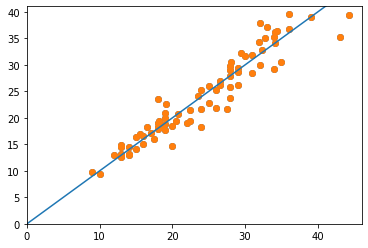

In [38]:
import matplotlib.pyplot as plt
# 시각화
y_pred = model.predict(norm_test_set).flatten()

plt.scatter(y_test, y_pred)
plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
plt.scatter(y_test, y_pred)
_=plt.plot([-100,100],[-100,100])
plt.show()